<a href="https://colab.research.google.com/github/himanshutyagi2020/Tensorflow/blob/main/Project_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following are the steps coded below: Here's summary
1. Download the dataset: Data from Google Drive of dataset was downloaded and extracted. After extraction it was uploaded to BITS Google Drive under /content/gdrive/MyDrive/data1_0.2.csv
2. Import the required libraries
3. Input and output shapes
- X: features/data (inputs)
- y: labels (outputs)
4. Check the missing values
5. Visualize the data
6. Split data into train and validation sets
- Models with (70% and 30%) 
- Models with (75% and 25%) 
5. Creating a model
5. Compiling a model
6. Defining a loss function
7. Setting up an optimizer
8. Creating evaluation metrics
9. Fitting a model (getting it to find patterns in our data)
10. Evaluating a model
11. Looking at training curves

**Model Summary:**
- Sequential API 
- BinaryCrossentropy
- optimizers.SGD 
- optimizers.Adam 
- activation="relu"
- activation="sigmoid"

**Models with (70% training and 30% validation data)** 
- model_1 = Single layer (4) using
            BinaryCrossentropy
            optimizers.SGD
            accuracy= 59.13%
- model_2 = multi layers (8,4) with Adam(lr=0.001) using
            BinaryCrossentropy
            optimizers.Adam(lr=0.001)
            accuracy= 54.35%
- model_3 = multi layers (12,8,4) with Adam(lr=0.001) using
            BinaryCrossentropy
            optimizers.Adam(lr=0.001)
            accuracy= 59.13%
- **model_4** = multi layers (16,12,8,4) with Adam(lr=0.001) using
            BinaryCrossentropy
            optimizers.Adam(lr=0.001)
            **accuracy= 90.87%**
- model_5 = multi layers (16,12,8,4) with relu & sigmoid(lr=0.01) using
            BinaryCrossentropy
            optimizers.Adam(lr=0.01)
            accuracy= 68.26%
- model_6 = multi layers (16,12,8,4) with relu & sigmoid using
            BinaryCrossentropy
            optimizers.Adam(lr=0.01)
            accuracy= 68.26%
- model_7 = multi layers (16,12,8,4) with relu & sigmoid, Adam(lr=0.02) using
            BinaryCrossentropy
            optimizers.Adam(lr=0.01)
            accuracy= 69.57%

**Models with (75% training and 25% validation data)**
** feature transformation (derived feature) using standarization: Standardscaler from sklearn library**

- **model_8** = multi layers (16,12,8,4) with Adam(lr=0.001) using
            BinaryCrossentropy
            optimizers.Adam(lr=0.001)
            **accuracy= 92.17%**
- model_9 = multi layers (16,12,8,4) with Adam(lr=0.01) using
            BinaryCrossentropy
            optimizers.Adam(lr=0.01)
            accuracy= 78.70%

1. Load the attached csv file in python. Each row consists of feature 1, feature 2, class label.
 

2. Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved. [0.5+1 mark]

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
## Defining the path to the datasets
data_path = "/content/gdrive/MyDrive/data1_0.2.csv"

In [ ]:
# Following libraries will be uploaded to process the data and build model. 
import numpy as np
import pandas as pd

In [ ]:
# Make dataframe of features and labels (naming column1 as feature 1, column2 as feature 2 and 
#column 3 as target/label)
df = pd.read_csv(data_path,names=['feature1', 'feature2', 'label'])

In [ ]:
#check the data shape
df.shape

(765, 3)

In [ ]:
# Missing values check
missing_data = df.isna().sum().sort_values(ascending=False)
percentage_missing = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)
missing_info.style.background_gradient()

,Missing values,Percentage
label,0,0.000000
feature2,0,0.000000
feature1,0,0.000000


In [ ]:
df.head(10)

,feature1,feature2,label
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0
5,-0.493781,-0.339981,0
6,0.505439,0.264136,0
7,0.222880,0.450681,0
8,0.170211,-0.542432,0
9,0.338921,-0.394976,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df.tail(10)

,feature1,feature2,label
755,-0.279084,0.183850,1
756,-0.033757,0.346703,1
757,-0.258535,0.274430,1
758,0.321809,-0.717153,1
759,-0.154835,0.209121,1
760,0.218472,0.184996,1
761,-0.097992,-0.302559,1
762,-0.236467,0.212870,1
763,0.745290,-0.210026,1
764,0.248667,0.218322,1


In [ ]:
df.columns

Index(['feature1', 'feature2', 'label'], dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of      feature1  feature2  label
0    0.046000 -0.181767      0
1   -0.516146  0.210068      0
2    0.246368 -0.514901      0
3   -0.176004  0.538347      0
4   -0.540533  0.239300      0
..        ...       ...    ...
760  0.218472  0.184996      1
761 -0.097992 -0.302559      1
762 -0.236467  0.212870      1
763  0.745290 -0.210026      1
764  0.248667  0.218322      1

[765 rows x 3 columns]>

In [ ]:
df['label'].unique()

array([0, 1])

In [ ]:
# Check out the different labels
df.label.value_counts()

0    445
1    320
Name: label, dtype: int64

Alright, looks like we're dealing with a binary classification problem. It's binary because there are only two labels (0 or 1).

If there were more label options (e.g. 0, 1, 2, 3 or 4), it would be called multiclass classification.

Let's take our visualization a step further and plot our data.

In [ ]:
X = df[['feature1', 'feature2']]
y = df['label']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

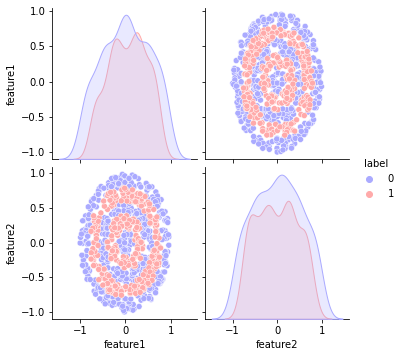

In [ ]:
sns.pairplot(df,hue='label',palette='bwr')

In [ ]:
# Check the shapes of our features and labels
print(X.shape,y.shape)

(765, 2) (765,)


In [ ]:
# Check how many samples we have
print(len(X), len(y))

765 765


In [ ]:
## Following libraries will be uploaded to process the data and build model. 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras import models
from keras import layers

In [ ]:
# Split data into train and test sets
# 70% of the data for the training set
# 30% of the data for the test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(535, 2)

In [ ]:
y_train.shape

(535,)

In [ ]:
X_test.shape

(230, 2)

In [ ]:
y_test.shape

(230,)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
17/17 [==============================] - 1s 2ms/step - loss: 1.3718 - accuracy: 0.5196
Epoch 2/5
17/17 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5308
Epoch 3/5
17/17 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5570
Epoch 4/5
17/17 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5645
Epoch 5/5
17/17 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5776


In [ ]:
# Train our model 
model_1.fit(X_train, y_train, epochs=5, verbose=0) # set verbose=0 to remove training updates

In [ ]:
model_1.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 4)                 12        
                                                                 
 dense_167 (Dense)           (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Print
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5913
Model loss on the test set: 0.6791272759437561
Model accuracy on the test set: 59.13%


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_2.fit(X_train, y_train, epochs=40)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 4.0901 - accuracy: 0.5776
Epoch 2/40
17/17 [==============================] - 0s 2ms/step - loss: 3.7279 - accuracy: 0.5776
Epoch 3/40
17/17 [==============================] - 0s 2ms/step - loss: 3.5753 - accuracy: 0.5776
Epoch 4/40
17/17 [==============================] - 0s 2ms/step - loss: 3.3866 - accuracy: 0.5776
Epoch 5/40
17/17 [==============================] - 0s 2ms/step - loss: 3.0308 - accuracy: 0.5776
Epoch 6/40
17/17 [==============================] - 0s 2ms/step - loss: 2.7267 - accuracy: 0.5664
Epoch 7/40
17/17 [==============================] - 0s 2ms/step - loss: 2.5015 - accuracy: 0.5402
Epoch 8/40
17/17 [==============================] - 0s 4ms/step - loss: 2.3874 - accuracy: 0.5178
Epoch 9/40
17/17 [==============================] - 0s 2ms/step - loss: 2.1256 - accuracy: 0.5159
Epoch 10/40
17/17 [==============================] - 0s 2ms/step - loss: 1.8187 - accuracy: 0.5178
Epoch 11/40
17/17 [===========

In [ ]:
model_2.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 8)                 24        
                                                                 
 dense_169 (Dense)           (None, 4)                 36        
                                                                 
 dense_170 (Dense)           (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5913


[0.6854110956192017, 0.591304361820221]

In [ ]:
# Print
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5913
Model loss on the test set: 0.6854110956192017
Model accuracy on the test set: 59.13%


Text(0.5, 1.0, 'Model_2 training curves')

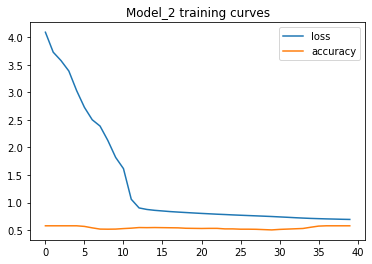

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_2 training curves")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(12, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 3,12 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer # binary since we are working with 2 clases (0 & 1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_3.fit(X_train, y_train, epochs=9,batch_size=512)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/9
2/2 [==============================] - 1s 8ms/step - loss: 1.5305 - accuracy: 0.5776
Epoch 2/9
2/2 [==============================] - 0s 7ms/step - loss: 1.2969 - accuracy: 0.5776
Epoch 3/9
2/2 [==============================] - 0s 5ms/step - loss: 1.2228 - accuracy: 0.5776
Epoch 4/9
2/2 [==============================] - 0s 5ms/step - loss: 1.1694 - accuracy: 0.5776
Epoch 5/9
2/2 [==============================] - 0s 8ms/step - loss: 1.1277 - accuracy: 0.5776
Epoch 6/9
2/2 [==============================] - 0s 7ms/step - loss: 1.0950 - accuracy: 0.5776
Epoch 7/9
2/2 [==============================] - 0s 5ms/step - loss: 1.0669 - accuracy: 0.5776
Epoch 8/9
2/2 [==============================] - 0s 5ms/step - loss: 1.0426 - accuracy: 0.5776
Epoch 9/9
2/2 [==============================] - 0s 6ms/step - loss: 1.0213 - accuracy: 0.5776


In [ ]:
model_3.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 12)                36        
                                                                 
 dense_172 (Dense)           (None, 8)                 104       
                                                                 
 dense_173 (Dense)           (None, 4)                 36        
                                                                 
 dense_174 (Dense)           (None, 1)                 5         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.9755 - accuracy: 0.5913


[0.9755110144615173, 0.591304361820221]

In [ ]:
# Print
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.9755 - accuracy: 0.5913
Model loss on the test set: 0.9755110144615173
Model accuracy on the test set: 59.13%


Text(0.5, 1.0, 'Model_3 training curves')

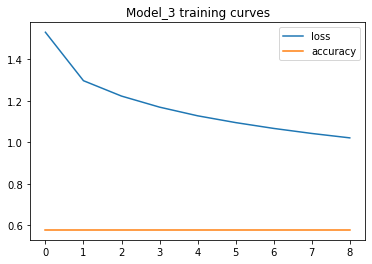

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_3 training curves")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(12, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 3,12 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 4,16 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(X_train, y_train, epochs=275, batch_size=10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/275
54/54 [==============================] - 1s 2ms/step - loss: 1.0600 - accuracy: 0.5776
Epoch 2/275
54/54 [==============================] - 0s 2ms/step - loss: 0.7801 - accuracy: 0.5308
Epoch 3/275
54/54 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.5327
Epoch 4/275
54/54 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.4935
Epoch 5/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5551
Epoch 6/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5383
Epoch 7/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5664
Epoch 8/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5757
Epoch 9/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5757
Epoch 10/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5776
Epoch 11/

In [ ]:
model_4.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 16)                48        
                                                                 
 dense_176 (Dense)           (None, 12)                204       
                                                                 
 dense_177 (Dense)           (None, 8)                 104       
                                                                 
 dense_178 (Dense)           (None, 4)                 36        
                                                                 
 dense_179 (Dense)           (None, 1)                 5         
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model
model_4.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9304


[0.1373031884431839, 0.9304347634315491]

In [ ]:
# Print
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9304
Model loss on the test set: 0.1373031884431839
Model accuracy on the test set: 93.04%


Text(0.5, 1.0, 'Model_4 training curves')

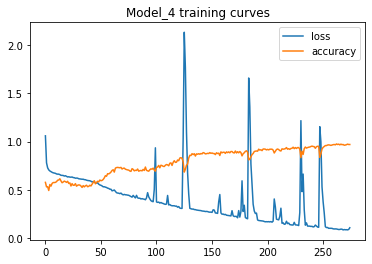

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_4 training curves")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(X_train, y_train, epochs=275, batch_size=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/275
27/27 [==============================] - 1s 2ms/step - loss: 0.6803 - accuracy: 0.5664
Epoch 2/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5776
Epoch 3/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5776
Epoch 4/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.5813
Epoch 5/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.5664
Epoch 6/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.5850
Epoch 7/275
27/27 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.6505
Epoch 8/275
27/27 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.6860
Epoch 9/275
27/27 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.6748
Epoch 10/275
27/27 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.6729
Epoch 11/

In [ ]:
model_5.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 16)                48        
                                                                 
 dense_181 (Dense)           (None, 12)                204       
                                                                 
 dense_182 (Dense)           (None, 8)                 104       
                                                                 
 dense_183 (Dense)           (None, 4)                 36        
                                                                 
 dense_184 (Dense)           (None, 1)                 5         
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_5.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.6826
Model loss on the test set: 0.5073431134223938
Model accuracy on the test set: 68.26%


Text(0.5, 1.0, 'Model_5 training curves')

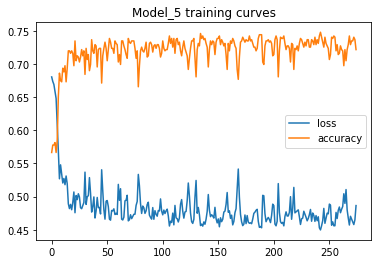

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_5 training curves")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
   tf.keras.layers.Dense(16, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_6.compile(loss="binary_crossentropy", 
              optimizer="Adam", 
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_6.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4393 - lr: 1.0000e-04
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4654 - lr: 1.1220e-04
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4972 - lr: 1.2589e-04
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5178 - lr: 1.4125e-04
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5364 - lr: 1.5849e-04
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5495 - lr: 1.7783e-04
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5589 - lr: 1.9953e-04
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5720 - lr: 2.2387e-04
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss:

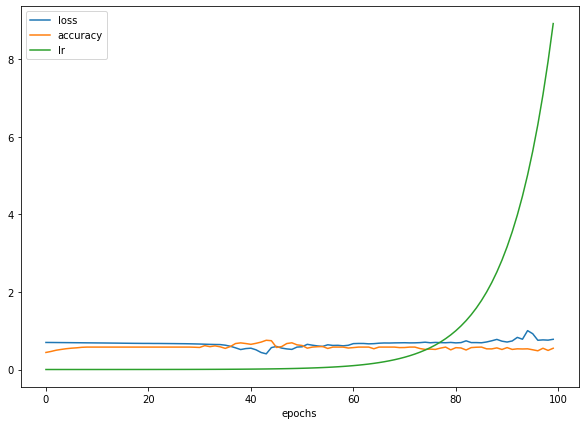

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

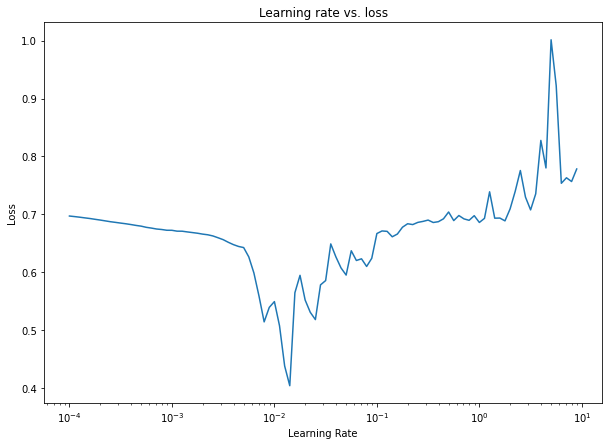

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7= tf.keras.Sequential([
   tf.keras.layers.Dense(16, activation="relu"), # hidden layer 1, using "relu" for activation
   tf.keras.layers.Dense(12, activation="relu"),
   tf.keras.layers.Dense(8, activation="relu"),
   tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model with the ideal learning rate
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, we need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 300 epochs
history = model_7.fit(X_train, y_train, epochs=300, batch_size=25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/300
22/22 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.5589
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5776
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.5776
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5738
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6037
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.5757
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.5551
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.6075
Epoch 9/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.6299
Epoch 10/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.6262
Epoch 11/

In [ ]:
# Evaluate model on the test dataset
model_7.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.6957


[0.49596911668777466, 0.695652186870575]

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.6957
Model loss on test set: 0.49596911668777466
Model accuracy on test set: 69.57%


Text(0.5, 1.0, 'Model_7 training curves')

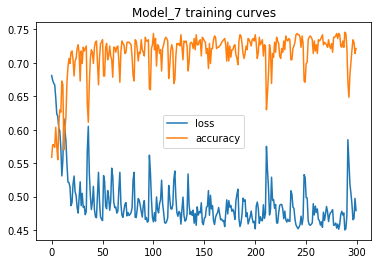

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 training curves")

3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 75% training and 25% validation data, appropriate learning rate, activation and loss functions. Explain the final results. [1+1+0.5 marks]

In [ ]:
print(df)

     feature1  feature2  label
0    0.046000 -0.181767      0
1   -0.516146  0.210068      0
2    0.246368 -0.514901      0
3   -0.176004  0.538347      0
4   -0.540533  0.239300      0
..        ...       ...    ...
760  0.218472  0.184996      1
761 -0.097992 -0.302559      1
762 -0.236467  0.212870      1
763  0.745290 -0.210026      1
764  0.248667  0.218322      1

[765 rows x 3 columns]


In [ ]:
df.head(1000)

,feature1,feature2,label
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0
...,...,...,...
760,0.218472,0.184996,1
761,-0.097992,-0.302559,1
762,-0.236467,0.212870,1
763,0.745290,-0.210026,1


In [ ]:
print(X)

     feature1  feature2
0    0.046000 -0.181767
1   -0.516146  0.210068
2    0.246368 -0.514901
3   -0.176004  0.538347
4   -0.540533  0.239300
..        ...       ...
760  0.218472  0.184996
761 -0.097992 -0.302559
762 -0.236467  0.212870
763  0.745290 -0.210026
764  0.248667  0.218322

[765 rows x 2 columns]


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
760    1
761    1
762    1
763    1
764    1
Name: label, Length: 765, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train_3)

     feature1  feature2
395  0.422118  0.114086
132  0.382569  0.347668
702 -0.026098 -0.362983
691  0.238963  0.087569
716  0.732473 -0.294135
..        ...       ...
71   0.019536 -0.590529
106 -0.093597 -0.496273
270  0.426609 -0.211310
435 -0.551417 -0.649543
102  0.198639 -0.017705

[573 rows x 2 columns]


In [ ]:
print(y_train_3)

395    0
132    0
702    1
691    1
716    1
      ..
71     0
106    0
270    0
435    0
102    0
Name: label, Length: 573, dtype: int64


In [ ]:
# standarization: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
# fit_transform
X_train_scaled=scaler.fit_transform(X_train_3)

In [ ]:
print(X_train_scaled)

[[ 0.82639493  0.22445916]
 [ 0.74424399  0.69054447]
 [-0.10464086 -0.72747193]
 ...
 [ 0.83572518 -0.42482787]
 [-1.19583464 -1.29926729]
 [ 0.36218486 -0.03851205]]


In [ ]:
X_test_scaled=scaler.transform(X_test_3)

In [ ]:
print(X_test_scaled)

[[-1.14656087 -1.33934433]
 [ 0.69802789 -0.39670213]
 [ 0.28044064 -0.48292857]
 [ 0.30184935 -1.78329146]
 [-1.71496632 -0.0182001 ]
 [ 0.36493107  1.17657716]
 [-0.16369663  1.41396499]
 [ 0.17260212  0.89447985]
 [ 0.76024751  0.81806696]
 [-1.48192841 -1.39875623]
 [-1.8532342  -0.38803798]
 [ 0.67171021 -1.4496228 ]
 [ 1.48019615 -1.11414626]
 [-0.90479274 -1.51376844]
 [-0.85000881  0.22934095]
 [-0.04427224 -0.18683727]
 [ 1.74704321  0.11805618]
 [ 1.27606284 -0.20258622]
 [ 1.10327103  0.54960041]
 [ 1.1436582   0.70234486]
 [ 1.79942246 -0.37715803]
 [ 0.53142586 -0.00358953]
 [ 0.08752449 -0.59779012]
 [ 1.55102852 -0.15866882]
 [-1.1141005  -1.02068699]
 [-1.27841207  1.21796588]
 [ 0.77550486  0.61837296]
 [-1.52927446 -0.45317949]
 [-0.16097422 -0.25516514]
 [-1.60715581  1.18176313]
 [ 0.20846899  0.99132533]
 [-0.06218622 -0.18577339]
 [-0.80490445 -0.95906851]
 [-0.1709964  -1.32665487]
 [-0.25397889 -0.60690331]
 [-1.3029385  -0.08639012]
 [-0.68760109 -1.30038851]
 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(12, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 3,12 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 4,16 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train_3, y_train_3, epochs=275, batch_size=10)

Epoch 1/275


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


58/58 [==============================] - 1s 2ms/step - loss: 1.2142 - accuracy: 0.5707
Epoch 2/275
58/58 [==============================] - 0s 2ms/step - loss: 0.7653 - accuracy: 0.5236
Epoch 3/275
58/58 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.5166
Epoch 4/275
58/58 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.4991
Epoch 5/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5323
Epoch 6/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5620
Epoch 7/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5620
Epoch 8/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5724
Epoch 9/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5742
Epoch 10/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5689
Epoch 11/275
58/58 [=

In [ ]:
model_8.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_195 (Dense)           (None, 16)                48        
                                                                 
 dense_196 (Dense)           (None, 12)                204       
                                                                 
 dense_197 (Dense)           (None, 8)                 104       
                                                                 
 dense_198 (Dense)           (None, 4)                 36        
                                                                 
 dense_199 (Dense)           (None, 1)                 5         
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model
model_8.evaluate(X_test_3, y_test_3)

6/6 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9271


[0.22156496345996857, 0.9270833134651184]

In [ ]:
# Print
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 3ms/step - loss: 0.2136 - accuracy: 0.9217
Model loss on the test set: 0.21357376873493195
Model accuracy on the test set: 92.17%


Text(0.5, 1.0, 'Model_8 training curves')

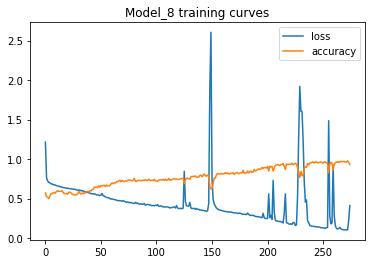

In [ ]:
 #Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_9.fit(X_train_3, y_train_3, epochs=275, batch_size=10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/275
58/58 [==============================] - 1s 2ms/step - loss: 0.6842 - accuracy: 0.5620
Epoch 2/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5724
Epoch 3/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5724
Epoch 4/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5812
Epoch 5/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.5654
Epoch 6/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.5724
Epoch 7/275
58/58 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.6457
Epoch 8/275
58/58 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.6719
Epoch 9/275
58/58 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7033
Epoch 10/275
58/58 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.6876
Epoch 11/

In [ ]:
model_9.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 16)                48        
                                                                 
 dense_201 (Dense)           (None, 12)                204       
                                                                 
 dense_202 (Dense)           (None, 8)                 104       
                                                                 
 dense_203 (Dense)           (None, 4)                 36        
                                                                 
 dense_204 (Dense)           (None, 1)                 5         
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.7870
Model loss on the test set: 0.40312328934669495
Model accuracy on the test set: 78.70%


Text(0.5, 1.0, 'Model_9 training curves')

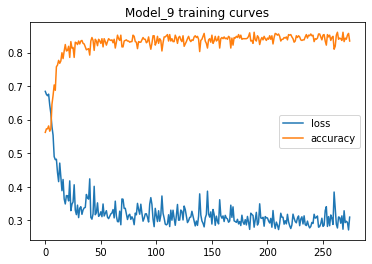

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 training curves")

Complete!!!